In [1]:
import requests
import json

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import difflib

In [3]:
#https://www.football-data.org

In [4]:
import http.client
import json

connection = http.client.HTTPConnection('api.football-data.org')
headers = { 'X-Auth-Token': '3b794eb83c944c879ada8dcb6e2900e3' }
connection.request('GET', '/v2/competitions/PD', None, headers )
response = json.loads(connection.getresponse().read().decode())

print (response)

{'id': 2014, 'area': {'id': 2224, 'name': 'Spain'}, 'name': 'Primera Division', 'code': 'PD', 'emblemUrl': None, 'plan': 'TIER_ONE', 'currentSeason': {'id': 635, 'startDate': '2020-09-13', 'endDate': '2021-05-23', 'currentMatchday': 30, 'winner': None}, 'seasons': [{'id': 635, 'startDate': '2020-09-13', 'endDate': '2021-05-23', 'currentMatchday': 30, 'winner': None}, {'id': 519, 'startDate': '2019-08-16', 'endDate': '2020-07-19', 'currentMatchday': 38, 'winner': {'id': 86, 'name': 'Real Madrid CF', 'shortName': 'Real Madrid', 'tla': 'RMA', 'crestUrl': 'https://crests.football-data.org/86.svg'}}, {'id': 281, 'startDate': '2018-08-17', 'endDate': '2019-05-26', 'currentMatchday': 38, 'winner': {'id': 81, 'name': 'FC Barcelona', 'shortName': 'Barça', 'tla': 'FCB', 'crestUrl': 'https://crests.football-data.org/81.svg'}}, {'id': 16, 'startDate': '2017-08-18', 'endDate': '2018-05-20', 'currentMatchday': 38, 'winner': {'id': 81, 'name': 'FC Barcelona', 'shortName': 'Barça', 'tla': 'FCB', 'cres

In [5]:
# DATA SET liga 2018-2019

In [6]:
dframe = pd.read_csv("laliga_player_stats_spanish.csv", encoding='utf-8')

In [65]:
dframe.head(5)

,Equipo,Posicion,Nombre,Minutos jugados,Partidos jugados,Goles marcados,Asistencias de gol,Goles marcados de penalti
0,Athletic Club,Portero,Hodei Oleaga,0.000,0,0,0,0
1,Athletic Club,Portero,A. Remiro,0.000,0,0,0,0
2,Athletic Club,Portero,Herrerín,2.790,31,0,1,0
3,Athletic Club,Portero,Unai Simón,630.000,7,0,0,0
4,Athletic Club,Defensa,Núñez,1.063,12,0,0,0


In [8]:
dframe.head(10)

,Equipo,Posicion,Dorsal,Nombre,Minutos jugados,Partidos jugados,Porcentaje de Partidos jugados,Partidos jugados enteros,Porcentaje de Partidos jugados enteros,Partidos jugados como titular,...,Corneres lanzados,Entradas realizadas,Duelos realizados,Duelos cuerpo a cuerpo realizados,Duelos aéreos realizados,Pases,Pases cortos,Pases largos,Pases al hueco,Goles marcados por tiros realizados
0,Athletic Club,Portero,NaN,Hodei Oleaga,0.000,0,"0,0%",0,"0,0%",0,...,0,0,0,0,0,0.000,0.000,0,0,0
1,Athletic Club,Portero,1.0,A. Remiro,0.000,0,"0,0%",0,"0,0%",0,...,0,0,0,0,0,0.000,0.000,0,0,0
2,Athletic Club,Portero,13.0,Herrerín,2.790,31,"82,0%",31,"82,0%",31,...,0,0,25,6,19,887.000,128.000,759,1,0
3,Athletic Club,Portero,25.0,Unai Simón,630.000,7,"18,0%",7,"18,0%",7,...,0,0,3,2,1,155.000,49.000,106,0,0
4,Athletic Club,Defensa,3.0,Núñez,1.063,12,"32,0%",11,"29,0%",11,...,0,15,107,38,69,536.000,457.000,78,1,0
5,Athletic Club,Defensa,4.0,I. Martínez,2.903,33,"87,0%",32,"84,0%",33,...,0,53,329,162,167,1.440,1.074,361,5,0
6,Athletic Club,Defensa,5.0,Yeray,2.614,30,"79,0%",28,"74,0%",30,...,0,55,296,126,170,1.284,1.051,233,0,0
7,Athletic Club,Defensa,6.0,San José,1.716,33,"87,0%",15,"39,0%",16,...,0,42,243,141,102,707.000,637.000,64,6,0
8,Athletic Club,Defensa,12.0,Yuri B.,3.120,35,"92,0%",33,"87,0%",35,...,2,48,373,254,119,1.367,1.273,92,2,1
9,Athletic Club,Defensa,15.0,I. Lekue,210.000,4,"11,0%",2,"5,0%",2,...,2,5,29,20,9,85.000,75.000,10,0,0


In [9]:
dframe.shape

(556, 62)

In [10]:
dframe.columns

Index(['Equipo', 'Posicion', 'Dorsal', 'Nombre', 'Minutos jugados',
       'Partidos jugados', 'Porcentaje de Partidos jugados',
       'Partidos jugados enteros', 'Porcentaje de Partidos jugados enteros',
       'Partidos jugados como titular',
       'Porcentaje de Partidos jugados como titular', 'Partidos sustituido',
       'Porcentaje de Partidos sustituido', 'Tarjetas amarillas',
       'Tarjetas rojas', 'Segunda tarjeta amarilla', 'Goles marcados',
       'Penaltis marcados', 'Goles en propia puerta',
       'Goles encajados mientras el jugador estaba en el campo', 'Bloqueos',
       'Intercepciones', 'Recuperaciones', 'Despejes', 'Entradas con éxito',
       'Entradas fallidas', 'Jugadas como último hombre', 'Duelos con éxito',
       'Duelos fallidos', 'Duelos aéreos con éxito', 'Duelos aéreos fallidos',
       'Fueras de juegos cometidos', 'Faltas recibidas', 'Faltas cometidas',
       'Penaltis recibidos', 'Penaltis cometidos', 'Faltas por manos',
       'Faltas cometidas po

In [11]:
dframe.Equipo.unique()

array(['Athletic Club', 'Atlético de Madrid', 'CD Leganés', 'D. Alavés',
       'FC Barcelona', 'Getafe CF', 'Girona FC', 'Levante UD',
       'R. Valladolid CF', 'Rayo Vallecano', 'RC Celta', 'RCD Espanyol',
       'Real Betis', 'Real Madrid', 'Real Sociedad', 'SD Eibar',
       'SD Huesca', 'Sevilla FC', 'Valencia CF', 'Villarreal CF'],
      dtype=object)

In [64]:
dframe.head(5)

,Equipo,Posicion,Nombre,Minutos jugados,Partidos jugados,Goles marcados,Asistencias de gol,Goles marcados de penalti
0,Athletic Club,Portero,Hodei Oleaga,0.000,0,0,0,0
1,Athletic Club,Portero,A. Remiro,0.000,0,0,0,0
2,Athletic Club,Portero,Herrerín,2.790,31,0,1,0
3,Athletic Club,Portero,Unai Simón,630.000,7,0,0,0
4,Athletic Club,Defensa,Núñez,1.063,12,0,0,0


In [13]:
# Vamos a borrar las columnas que no necesitaremos

In [14]:
dframe.columns

Index(['Equipo', 'Posicion', 'Dorsal', 'Nombre', 'Minutos jugados',
       'Partidos jugados', 'Porcentaje de Partidos jugados',
       'Partidos jugados enteros', 'Porcentaje de Partidos jugados enteros',
       'Partidos jugados como titular',
       'Porcentaje de Partidos jugados como titular', 'Partidos sustituido',
       'Porcentaje de Partidos sustituido', 'Tarjetas amarillas',
       'Tarjetas rojas', 'Segunda tarjeta amarilla', 'Goles marcados',
       'Penaltis marcados', 'Goles en propia puerta',
       'Goles encajados mientras el jugador estaba en el campo', 'Bloqueos',
       'Intercepciones', 'Recuperaciones', 'Despejes', 'Entradas con éxito',
       'Entradas fallidas', 'Jugadas como último hombre', 'Duelos con éxito',
       'Duelos fallidos', 'Duelos aéreos con éxito', 'Duelos aéreos fallidos',
       'Fueras de juegos cometidos', 'Faltas recibidas', 'Faltas cometidas',
       'Penaltis recibidos', 'Penaltis cometidos', 'Faltas por manos',
       'Faltas cometidas po

In [15]:
dframe = dframe.drop(columns=['Fueras de juegos cometidos', 'Faltas recibidas', 'Faltas cometidas',
       'Penaltis recibidos', 'Penaltis cometidos', 'Faltas por manos',
       'Faltas cometidas por cada tarjetas recibida', 'Tiros realizados',
       'Tiros a puerta', 'Regates realizados con éxito','Porcentaje de Partidos jugados',
       'Partidos jugados enteros', 'Porcentaje de Partidos jugados enteros',
       'Partidos jugados como titular',
       'Porcentaje de Partidos jugados como titular', 'Partidos sustituido',
       'Porcentaje de Partidos sustituido', 'Tarjetas amarillas',
       'Tarjetas rojas', 'Segunda tarjeta amarilla',
       'Penaltis marcados', 'Goles en propia puerta',
       'Goles encajados mientras el jugador estaba en el campo', 'Bloqueos',
       'Intercepciones', 'Recuperaciones', 'Despejes', 'Entradas con éxito',
       'Entradas fallidas', 'Jugadas como último hombre', 'Duelos con éxito','Goles marcados en propia puerta', 'Centros realizados',
       'Corneres lanzados', 'Entradas realizadas', 'Duelos realizados',
       'Duelos cuerpo a cuerpo realizados', 'Duelos aéreos realizados',
       'Pases', 'Pases cortos', 'Pases largos', 'Pases al hueco',
       'Goles marcados por tiros realizados'])

In [16]:
dframe = dframe.drop(columns=['Duelos fallidos',
       'Duelos aéreos con éxito', 'Duelos aéreos fallidos',
       'Regates fallidos',
       'Goles marcados desde dentro del área',
       'Goles marcados desde fuera del área',
       'Goles marcados con el pie izquierdo',
       'Goles marcados con el pie derecho',
       'Goles marcados de cabeza', 'Goles marcados de jugada a balón parado'])

In [17]:
dframe = dframe.drop(columns=['Dorsal'])

In [63]:
dframe.head(5)

,Equipo,Posicion,Nombre,Minutos jugados,Partidos jugados,Goles marcados,Asistencias de gol,Goles marcados de penalti
0,Athletic Club,Portero,Hodei Oleaga,0.000,0,0,0,0
1,Athletic Club,Portero,A. Remiro,0.000,0,0,0,0
2,Athletic Club,Portero,Herrerín,2.790,31,0,1,0
3,Athletic Club,Portero,Unai Simón,630.000,7,0,0,0
4,Athletic Club,Defensa,Núñez,1.063,12,0,0,0


### Cargamos el json que tenemos

In [19]:
import http.client
import json

connection = http.client.HTTPConnection('api.football-data.org')
headers = { 'X-Auth-Token': '3b794eb83c944c879ada8dcb6e2900e3' }
connection.request('GET', '/v2/competitions/PD', None, headers )
response = json.loads(connection.getresponse().read().decode())

print (response)

{'id': 2014, 'area': {'id': 2224, 'name': 'Spain'}, 'name': 'Primera Division', 'code': 'PD', 'emblemUrl': None, 'plan': 'TIER_ONE', 'currentSeason': {'id': 635, 'startDate': '2020-09-13', 'endDate': '2021-05-23', 'currentMatchday': 30, 'winner': None}, 'seasons': [{'id': 635, 'startDate': '2020-09-13', 'endDate': '2021-05-23', 'currentMatchday': 30, 'winner': None}, {'id': 519, 'startDate': '2019-08-16', 'endDate': '2020-07-19', 'currentMatchday': 38, 'winner': {'id': 86, 'name': 'Real Madrid CF', 'shortName': 'Real Madrid', 'tla': 'RMA', 'crestUrl': 'https://crests.football-data.org/86.svg'}}, {'id': 281, 'startDate': '2018-08-17', 'endDate': '2019-05-26', 'currentMatchday': 38, 'winner': {'id': 81, 'name': 'FC Barcelona', 'shortName': 'Barça', 'tla': 'FCB', 'crestUrl': 'https://crests.football-data.org/81.svg'}}, {'id': 16, 'startDate': '2017-08-18', 'endDate': '2018-05-20', 'currentMatchday': 38, 'winner': {'id': 81, 'name': 'FC Barcelona', 'shortName': 'Barça', 'tla': 'FCB', 'cres

### Importamos el json que hemos obtenido

In [20]:
import json

with open('response.json', encoding='utf-8') as project_file:    
    data = json.load(project_file)  

df = pd.json_normalize(data['matches'])

In [62]:
df.head(5)

,id,utcDate,status,matchday,homeTeam.id,homeTeam.name,awayTeam.id,awayTeam.name
0,246119,2018-08-17T18:15:00Z,FINISHED,1,298,Girona FC,250,Real Valladolid CF
1,246116,2018-08-17T20:15:00Z,FINISHED,1,90,Real Betis Balompié,88,Levante UD
2,246118,2018-08-18T16:15:00Z,FINISHED,1,558,RC Celta de Vigo,80,RCD Espanyol de Barcelona
3,246120,2018-08-18T18:15:00Z,FINISHED,1,94,Villarreal CF,92,Real Sociedad de Fútbol
4,246113,2018-08-18T20:15:00Z,FINISHED,1,81,FC Barcelona,263,Deportivo Alavés


In [22]:
df.columns

Index(['id', 'utcDate', 'status', 'matchday', 'stage', 'group', 'lastUpdated',
       'referees', 'season.id', 'season.startDate', 'season.endDate',
       'season.currentMatchday', 'odds.msg', 'score.winner', 'score.duration',
       'score.fullTime.homeTeam', 'score.fullTime.awayTeam',
       'score.halfTime.homeTeam', 'score.halfTime.awayTeam',
       'score.extraTime.homeTeam', 'score.extraTime.awayTeam',
       'score.penalties.homeTeam', 'score.penalties.awayTeam', 'homeTeam.id',
       'homeTeam.name', 'awayTeam.id', 'awayTeam.name'],
      dtype='object')

### Borramos columnas innecesarias

In [23]:
df = df.drop(columns=['score.fullTime.homeTeam', 'score.fullTime.awayTeam',
       'score.halfTime.homeTeam', 'score.halfTime.awayTeam',
       'score.extraTime.homeTeam', 'score.extraTime.awayTeam','referees',])

In [24]:
df = df.drop(columns=['season.id', 'season.startDate', 'season.endDate',
       'season.currentMatchday', 'odds.msg', 'score.winner', 'score.duration'])

In [25]:
df = df.drop(columns=['stage','group','score.penalties.homeTeam','score.penalties.awayTeam','lastUpdated'])

In [26]:
df

,id,utcDate,status,matchday,homeTeam.id,homeTeam.name,awayTeam.id,awayTeam.name
0,246119,2018-08-17T18:15:00Z,FINISHED,1,298,Girona FC,250,Real Valladolid CF
1,246116,2018-08-17T20:15:00Z,FINISHED,1,90,Real Betis Balompié,88,Levante UD
2,246118,2018-08-18T16:15:00Z,FINISHED,1,558,RC Celta de Vigo,80,RCD Espanyol de Barcelona
3,246120,2018-08-18T18:15:00Z,FINISHED,1,94,Villarreal CF,92,Real Sociedad de Fútbol
4,246113,2018-08-18T20:15:00Z,FINISHED,1,81,FC Barcelona,263,Deportivo Alavés
...,...,...,...,...,...,...,...,...
375,246487,2019-05-18T18:45:00Z,FINISHED,38,558,RC Celta de Vigo,87,Rayo Vallecano de Madrid
376,246489,2019-05-18T18:45:00Z,FINISHED,38,299,SD Huesca,745,CD Leganés
377,246490,2019-05-18T18:45:00Z,FINISHED,38,263,Deportivo Alavés,298,Girona FC
378,246482,2019-05-19T10:00:00Z,FINISHED,38,86,Real Madrid CF,90,Real Betis Balompié


### Juntamos los datos de nuestro data set con el json

In [60]:
result = pd.concat([dframe, df], axis=1)

In [61]:
result.head(5)

,Equipo,Posicion,Nombre,Minutos jugados,Partidos jugados,Goles marcados,Asistencias de gol,Goles marcados de penalti,id,utcDate,status,matchday,homeTeam.id,homeTeam.name,awayTeam.id,awayTeam.name
0,Athletic Club,Portero,Hodei Oleaga,0.000,0,0,0,0,246119.0,2018-08-17T18:15:00Z,FINISHED,1.0,298.0,Girona FC,250.0,Real Valladolid CF
1,Athletic Club,Portero,A. Remiro,0.000,0,0,0,0,246116.0,2018-08-17T20:15:00Z,FINISHED,1.0,90.0,Real Betis Balompié,88.0,Levante UD
2,Athletic Club,Portero,Herrerín,2.790,31,0,1,0,246118.0,2018-08-18T16:15:00Z,FINISHED,1.0,558.0,RC Celta de Vigo,80.0,RCD Espanyol de Barcelona
3,Athletic Club,Portero,Unai Simón,630.000,7,0,0,0,246120.0,2018-08-18T18:15:00Z,FINISHED,1.0,94.0,Villarreal CF,92.0,Real Sociedad de Fútbol
4,Athletic Club,Defensa,Núñez,1.063,12,0,0,0,246113.0,2018-08-18T20:15:00Z,FINISHED,1.0,81.0,FC Barcelona,263.0,Deportivo Alavés


### Renombramos columnas

In [29]:
result = result.rename(columns={"Goles marcados": 'Goles'})

In [30]:
result = result.rename(columns={"Minutos jugados": 'Minutos'})

In [31]:
result = result.rename(columns={"Partidos jugados": 'Partidos'})

In [32]:
result = result.rename(columns={"utcDate": 'Fecha'})

### Vemos datos null y los actualizamos

In [33]:
result["id"] = result.id.fillna(0)
result["Fecha"] = result.Fecha.fillna(0)
result["status"] = result.status.fillna(0)
result["matchday"] = result.matchday.fillna(0)


In [34]:
result.head(10)

,Equipo,Posicion,Nombre,Minutos,Partidos,Goles,Asistencias de gol,Goles marcados de penalti,id,Fecha,status,matchday,homeTeam.id,homeTeam.name,awayTeam.id,awayTeam.name
0,Athletic Club,Portero,Hodei Oleaga,0.000,0,0,0,0,246119.0,2018-08-17T18:15:00Z,FINISHED,1.0,298.0,Girona FC,250.0,Real Valladolid CF
1,Athletic Club,Portero,A. Remiro,0.000,0,0,0,0,246116.0,2018-08-17T20:15:00Z,FINISHED,1.0,90.0,Real Betis Balompié,88.0,Levante UD
2,Athletic Club,Portero,Herrerín,2.790,31,0,1,0,246118.0,2018-08-18T16:15:00Z,FINISHED,1.0,558.0,RC Celta de Vigo,80.0,RCD Espanyol de Barcelona
3,Athletic Club,Portero,Unai Simón,630.000,7,0,0,0,246120.0,2018-08-18T18:15:00Z,FINISHED,1.0,94.0,Villarreal CF,92.0,Real Sociedad de Fútbol
4,Athletic Club,Defensa,Núñez,1.063,12,0,0,0,246113.0,2018-08-18T20:15:00Z,FINISHED,1.0,81.0,FC Barcelona,263.0,Deportivo Alavés
5,Athletic Club,Defensa,I. Martínez,2.903,33,0,0,0,246121.0,2018-08-19T16:15:00Z,FINISHED,1.0,278.0,SD Eibar,299.0,SD Huesca
6,Athletic Club,Defensa,Yeray,2.614,30,0,0,0,246117.0,2018-08-19T18:15:00Z,FINISHED,1.0,87.0,Rayo Vallecano de Madrid,559.0,Sevilla FC
7,Athletic Club,Defensa,San José,1.716,33,0,0,0,246112.0,2018-08-19T20:15:00Z,FINISHED,1.0,86.0,Real Madrid CF,82.0,Getafe CF
8,Athletic Club,Defensa,Yuri B.,3.120,35,2,2,0,246114.0,2018-08-20T18:00:00Z,FINISHED,1.0,95.0,Valencia CF,78.0,Club Atlético de Madrid
9,Athletic Club,Defensa,I. Lekue,210.000,4,0,0,0,246115.0,2018-08-20T20:00:00Z,FINISHED,1.0,77.0,Athletic Club,745.0,CD Leganés


### Sumamos los minutos a los jugadores

In [35]:
total_minutos = ((result.groupby('Nombre')["Minutos"].sum()))

In [36]:
total_minutos.head(10)

Nombre
A. Ba                    2.111
A. Barragán            936.000
A. Guardado              2.338
A. Remiro                0.000
Aday Benítez           647.000
Adrià Pedrosa          760.000
Adrián Marín           287.000
Adrián Tellado           0.000
Adrián de la Fuente      0.000
Aduriz                 941.000
Name: Minutos, dtype: float64

### Sumamos el total de los goles a los equipos

In [37]:
total_gol = ((result.groupby('Equipo')["Goles"].sum()))

In [38]:
total_gol

Equipo
Athletic Club         42
Atlético de Madrid    53
CD Leganés            36
D. Alavés             33
FC Barcelona          87
Getafe CF             46
Girona FC             37
Levante UD            55
R. Valladolid CF      29
RC Celta              52
RCD Espanyol          41
Rayo Vallecano        40
Real Betis            41
Real Madrid           61
Real Sociedad         44
SD Eibar              46
SD Huesca             42
Sevilla FC            60
Valencia CF           52
Villarreal CF         46
Name: Goles, dtype: int64

### Sumamos el total de asistencias a los equipos

In [39]:
asistencias = ((result.groupby('Equipo')["Asistencias de gol"].sum()))

In [40]:
asistencias

Equipo
Athletic Club         29
Atlético de Madrid    36
CD Leganés            25
D. Alavés             23
FC Barcelona          60
Getafe CF             32
Girona FC             23
Levante UD            40
R. Valladolid CF      20
RC Celta              37
RCD Espanyol          23
Rayo Vallecano        24
Real Betis            30
Real Madrid           39
Real Sociedad         27
SD Eibar              25
SD Huesca             25
Sevilla FC            46
Valencia CF           39
Villarreal CF         32
Name: Asistencias de gol, dtype: int64

### Sumamos el total de penaltis a los equipos

In [41]:
penaltis = ((result.groupby('Equipo')["Goles marcados de penalti"].sum()))

In [42]:
penaltis

Equipo
Athletic Club         5
Atlético de Madrid    3
CD Leganés            3
D. Alavés             2
FC Barcelona          8
Getafe CF             6
Girona FC             6
Levante UD            5
R. Valladolid CF      4
RC Celta              7
RCD Espanyol          3
Rayo Vallecano        5
Real Betis            4
Real Madrid           9
Real Sociedad         8
SD Eibar              7
SD Huesca             6
Sevilla FC            5
Valencia CF           5
Villarreal CF         3
Name: Goles marcados de penalti, dtype: int64

### Vamos a juntar los datasets que tenemos en uno solo 

In [43]:
data2 = pd.DataFrame(total_gol)

In [44]:
data3 = pd.DataFrame(asistencias)

In [45]:
data4 = pd.DataFrame(penaltis)

In [46]:
data4

,Goles marcados de penalti
Equipo,
Athletic Club,5
Atlético de Madrid,3
CD Leganés,3
D. Alavés,2
FC Barcelona,8
Getafe CF,6
Girona FC,6
Levante UD,5
R. Valladolid CF,4


### Utilizamos Merge

In [47]:
data_final = (data2.merge(data3, on='Equipo', how='outer').merge(data4, on='Equipo', how='outer'))

In [48]:
data_final

,Goles,Asistencias de gol,Goles marcados de penalti
Equipo,,,
Athletic Club,42,29,5
Atlético de Madrid,53,36,3
CD Leganés,36,25,3
D. Alavés,33,23,2
FC Barcelona,87,60,8
Getafe CF,46,32,6
Girona FC,37,23,6
Levante UD,55,40,5
R. Valladolid CF,29,20,4


In [49]:
df_equipo = (data2.merge(data3, on='Equipo', how='outer').merge(data4, on='Equipo', how='outer'))

In [50]:
df_equipo

,Goles,Asistencias de gol,Goles marcados de penalti
Equipo,,,
Athletic Club,42,29,5
Atlético de Madrid,53,36,3
CD Leganés,36,25,3
D. Alavés,33,23,2
FC Barcelona,87,60,8
Getafe CF,46,32,6
Girona FC,37,23,6
Levante UD,55,40,5
R. Valladolid CF,29,20,4


### Reseteamos el indice Equipo

In [51]:
df_equipo.reset_index(inplace=True)

In [52]:
df_equipo

,Equipo,Goles,Asistencias de gol,Goles marcados de penalti
0,Athletic Club,42,29,5
1,Atlético de Madrid,53,36,3
2,CD Leganés,36,25,3
3,D. Alavés,33,23,2
4,FC Barcelona,87,60,8
5,Getafe CF,46,32,6
6,Girona FC,37,23,6
7,Levante UD,55,40,5
8,R. Valladolid CF,29,20,4
9,RC Celta,52,37,7


### Grafica de todos los equipos

<AxesSubplot:>

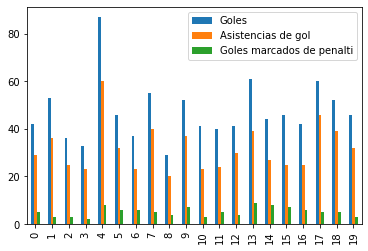

In [53]:
df_equipo.plot(kind="bar")


### Vamos a ver ahora los 5 mejores equipos con sus respectivos campos

In [54]:
df_equipo.sort_values(by=['Goles','Asistencias de gol','Goles marcados de penalti'], ascending=False).head(5)

,Equipo,Goles,Asistencias de gol,Goles marcados de penalti
4,FC Barcelona,87,60,8
13,Real Madrid,61,39,9
17,Sevilla FC,60,46,5
7,Levante UD,55,40,5
1,Atlético de Madrid,53,36,3


In [55]:
new_data = pd.DataFrame(df_equipo.sort_values(by=['Goles','Asistencias de gol','Goles marcados de penalti'], ascending=False).head(5))

In [56]:
new_data

,Equipo,Goles,Asistencias de gol,Goles marcados de penalti
4,FC Barcelona,87,60,8
13,Real Madrid,61,39,9
17,Sevilla FC,60,46,5
7,Levante UD,55,40,5
1,Atlético de Madrid,53,36,3


<AxesSubplot:>

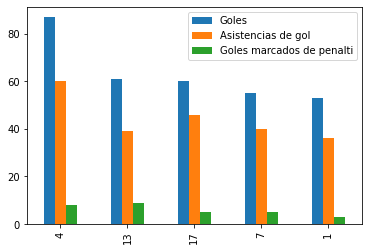

In [57]:
new_data.plot(kind="bar")

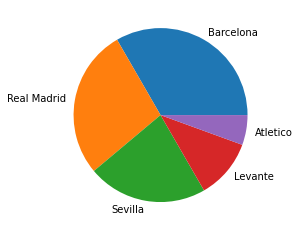

In [58]:
y = np.array([30, 25, 20, 10, 5])
mylabels = ["Barcelona", "Real Madrid", "Sevilla", "Levante", "Atletico"]

plt.pie(y, labels = mylabels)
plt.show() 

### Exportamos el data set final

In [59]:
new_data.to_csv('data_final.csv', index = False)